In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [2]:
#df = pd.read_pickle('../saved_files/cleaned_df.pkl')
df_fake = pd.read_csv('./dataset/Fake.csv')
df_true = pd.read_csv('./dataset/True.csv')

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
plt.plot(param_C,df_acc1.mean_test_score.astype(float), marker = 'o')
Title = 'Model Accuracy vs C Parameter with l1 Regulation'
Xlab = "log10 of C"
Ylab = "Accuracy"
plt.title(Title)
plt.xlabel(Xlab)
plt.ylabel(Ylab)
plt.show()

In [6]:
df_true['label'] = 0
df_fake['label'] = 1

In [55]:
df = pd.concat([df_true, df_fake],axis=0)

In [56]:
df = df.sample(frac = 1).reset_index(drop=True)

In [57]:
df.head()

,title,text,subject,date,label
0,U.S. House Freedom Caucus backs Republican tax...,WASHINGTON (Reuters) - The conservative Freedo...,politicsNews,"September 27, 2017",0
1,"The Last Time This Happened, It Signaled The ...",The last time this trade measure fell dramatic...,News,"January 23, 2016",1
2,Saudi king to start Russia visit on Thursday: ...,DUBAI (Reuters) - Saudi Arabia s King Salman w...,worldnews,"October 2, 2017",0
3,What Mississippi Just Passed Isn’t Only Ridic...,"Across the nation, mainly the South, there hav...",News,"March 31, 2016",1
4,Canada's Trudeau says will work with next U.S....,WASHINGTON (Reuters) - Canadian Prime Minister...,politicsNews,"March 10, 2016",0


In [58]:
# Preparing the target and predictors for modeling
# Keep the title and body text separated for different models
#X_body_text = df['clean_text'].values
#X_title_text = df['clean_title'].values
#y = df['label'].values

In [59]:
np.unique(df['subject'],return_counts = True)

(array(['Government News', 'Middle-east', 'News', 'US_News', 'left-news',
        'politics', 'politicsNews', 'worldnews'], dtype=object),
 array([ 1570,   778,  9050,   783,  4459,  6841, 11272, 10145],
       dtype=int64))

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [108]:
plt.rcParams['figure.figsize'] = (14.0, 6.0)
plt.rcParams['font.family'] = "serif"

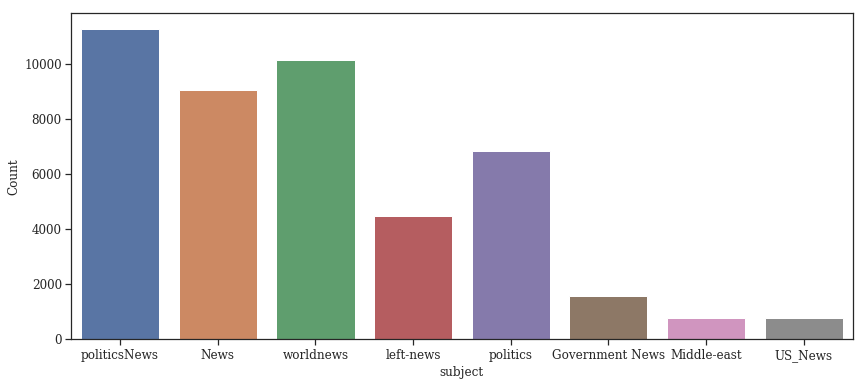

In [109]:
news_cat_count = sns.countplot(data=df, x = 'subject')
#news_cat_count.axes.set_title("Title",fontsize=30)
#news_cat_count.set_xlabel("Subject",fontsize=12)
news_cat_count.set_ylabel("Count",fontsize=12)
news_cat_count.tick_params(labelsize=12)
#sns.plt.show()

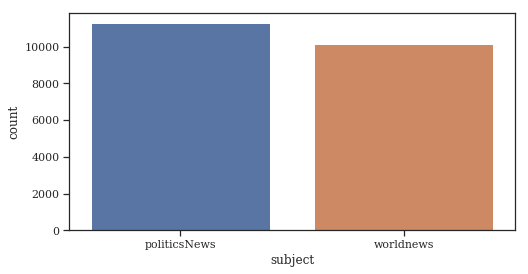

In [103]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['font.family'] = "serif"
news_true_cat_count = sns.countplot(data=df_true,x = 'subject')

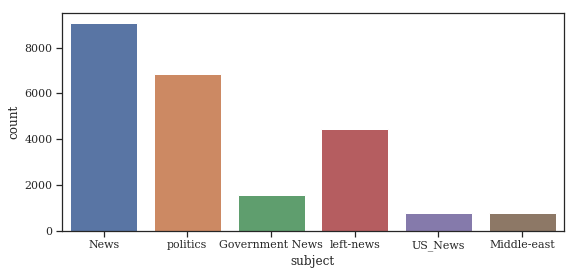

In [104]:
plt.rcParams['figure.figsize'] = (9.0, 4.0)
plt.rcParams['font.family'] = "serif"
news_fake_cat_count = sns.countplot(data=df_fake, x = 'subject')

In [65]:
df[['title', 'label']].groupby('label').agg('count')

,title
label,
0,21417
1,23481


In [66]:
df['text_len']=df['text'].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8BBCE02E8>]],
      dtype=object)

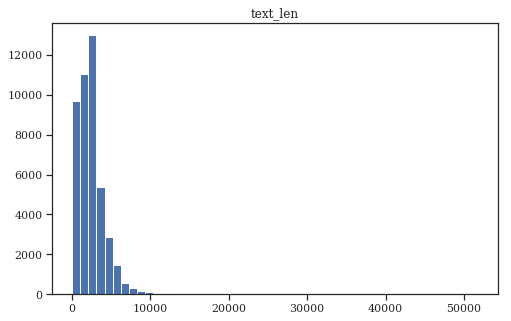

In [67]:
df.hist(column='text_len',bins=50,figsize=(8,5),grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8C3975630>,
      dtype=object)

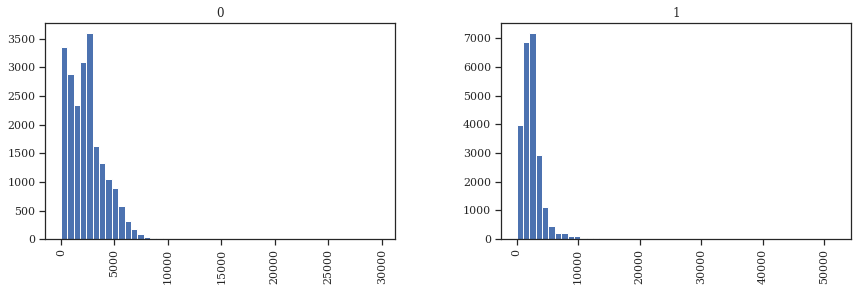

In [68]:
df.hist(column='text_len',by='label',bins=50,figsize=(14,4))

In [113]:
import re 
# using regex (findall()) 
# to count words in string 
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\w+', x)))

In [145]:
df.sort_values(by='num_words',ascending = False)['num_words'][:1000]

33671    8375
33418    8375
20081    8138
33481    8138
44276    7402
19783    7402
35990    7387
20293    7387
33204    6959
2217     6959
34598    6352
15087    6352
3387     5936
9528     5936
34209    5883
38410    5883
23776    5795
1350     5795
35397    5677
7906     5677
14124    5532
8116     5532
21040    5506
19812    5442
23239    5292
33744    5192
5972     5192
9630     5080
31801    5080
34418    4810
         ... 
6946     1187
19867    1187
17884    1186
14410    1186
20864    1186
38568    1185
21328    1185
10483    1184
17489    1184
16872    1184
18662    1184
35977    1184
40831    1183
42002    1183
32998    1183
40895    1182
38784    1182
32582    1181
38588    1181
2353     1181
10545    1180
699      1180
7507     1179
27499    1179
15658    1179
37343    1179
31247    1178
22090    1178
30991    1177
21113    1176
Name: num_words, Length: 1000, dtype: int64

(0, 6000)

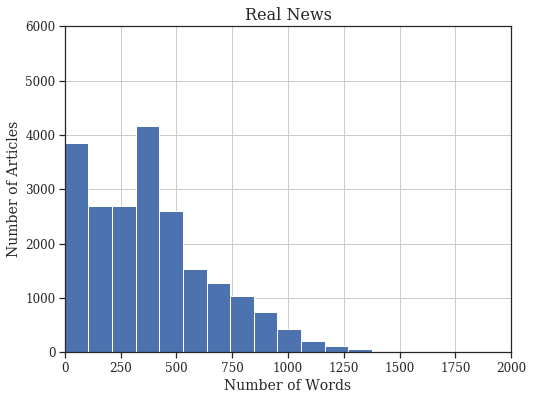

In [141]:
#df.sort_values(by='num_words',ascending = False)
df[df['label']==0].hist(column='num_words',bins=50,figsize=(8,6),xlabelsize=12, ylabelsize=12)
plt.title('Real News', fontdict=None, loc='center', pad=None, fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Number of Articles",fontsize=14)
plt.xlim([0,2000])
plt.ylim([0,6000])

(0, 6000)

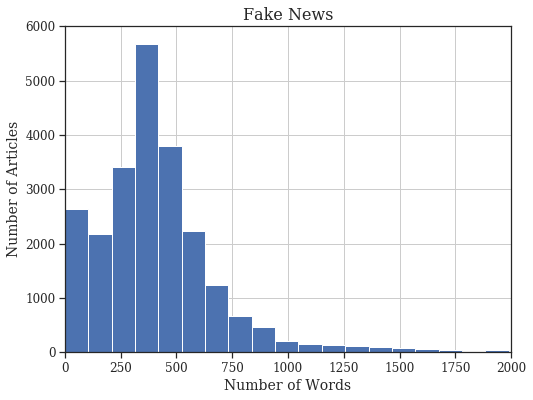

In [142]:
#df.sort_values(by='num_words',ascending = False)
df[df['label']==1].hist(column='num_words',bins=80,figsize=(8,6),xlabelsize=12, ylabelsize=12)
plt.title('Fake News', fontdict=None, loc='center', pad=None, fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Number of Articles",fontsize=14)
plt.xlim([0,2000])
plt.ylim([0,6000])

In [151]:
df2 = df.copy()

In [152]:
df2.head()

,title,text,subject,date,label,text_len,num_words
0,U.S. House Freedom Caucus backs Republican tax...,WASHINGTON (Reuters) - The conservative Freedo...,politicsNews,"September 27, 2017",0,274,46
1,"The Last Time This Happened, It Signaled The ...",The last time this trade measure fell dramatic...,News,"January 23, 2016",1,2674,486
2,Saudi king to start Russia visit on Thursday: ...,DUBAI (Reuters) - Saudi Arabia s King Salman w...,worldnews,"October 2, 2017",0,821,141
3,What Mississippi Just Passed Isn’t Only Ridic...,"Across the nation, mainly the South, there hav...",News,"March 31, 2016",1,2592,422
4,Canada's Trudeau says will work with next U.S....,WASHINGTON (Reuters) - Canadian Prime Minister...,politicsNews,"March 10, 2016",0,569,88


In [153]:
news_text = df2['text']

In [154]:
print(news_text[1])

The last time this trade measure fell dramatically, it signaled the incoming global financial crash of 2007/2008. Now, it s happening again. Only this time, it s dropped to the lowest point in its history.The Baltic Dry Index tracks the cost of shipping  dry goods  around the world. Historically, it has served as a sort of  bellwether  for the global economy. Why? Well, if the prices fall, it means that trade is dropping. If trade is dropping, the economy is about to take a hit.Now, back in late 2013, the Baltic Dry Index was flying high at 2,330. And even last August, it was still at a healthy 1,222.This week, it crashed to just 354.Image via Business InsiderThe reason this should stop us all in our tracks, is that the last time this happened, it heralded the global financial crisis of 2008   from which many economies have yet to recover. And back then, it was still over 600.As Business Insider reports:There are several other occasions when the index has pointed to a big correction in

In [155]:
#use regular expression to replace some specific text
# replace email address
processed_text = news_text.str.replace(r'^([a-zA-Z0-9_\-\.]+)@((\[[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.)|(([a-zA-Z0-9\-]+\.)+))([a-zA-Z]{2,4}|[0-9]{1,3})(\]?)$', 'email_address')

#replace 10 digit phone number
#processed_text = processed_text.str.replace(r'^[^0-9]*(?:(\d)[^0-9]*){10}$', 'phone_number')

#replace normal number with numbr
#processed_text = processed_text.str.replace(r'\d+(\.\d+)?', 'numbr')

#remove punctuation
processed_text = processed_text.str.replace(r'[^\w\d\s]', ' ')

#remove whitespace between terms with a single space
processed_text = processed_text.str.replace(r'\s+', ' ')

#remove leading and trailing whitespace
processed_text = processed_text.str.replace(r'^\s+|\s+?$', '')

In [156]:
print(processed_text[1])

The last time this trade measure fell dramatically it signaled the incoming global financial crash of 2007 2008 Now it s happening again Only this time it s dropped to the lowest point in its history The Baltic Dry Index tracks the cost of shipping dry goods around the world Historically it has served as a sort of bellwether for the global economy Why Well if the prices fall it means that trade is dropping If trade is dropping the economy is about to take a hit Now back in late 2013 the Baltic Dry Index was flying high at 2 330 And even last August it was still at a healthy 1 222 This week it crashed to just 354 Image via Business InsiderThe reason this should stop us all in our tracks is that the last time this happened it heralded the global financial crisis of 2008 from which many economies have yet to recover And back then it was still over 600 As Business Insider reports There are several other occasions when the index has pointed to a big correction in the global economy The Balt

In [157]:
processed_text = processed_text.str.lower()

In [158]:
print(processed_text[1])

the last time this trade measure fell dramatically it signaled the incoming global financial crash of 2007 2008 now it s happening again only this time it s dropped to the lowest point in its history the baltic dry index tracks the cost of shipping dry goods around the world historically it has served as a sort of bellwether for the global economy why well if the prices fall it means that trade is dropping if trade is dropping the economy is about to take a hit now back in late 2013 the baltic dry index was flying high at 2 330 and even last august it was still at a healthy 1 222 this week it crashed to just 354 image via business insiderthe reason this should stop us all in our tracks is that the last time this happened it heralded the global financial crisis of 2008 from which many economies have yet to recover and back then it was still over 600 as business insider reports there are several other occasions when the index has pointed to a big correction in the global economy the balt

In [159]:
#remove stopwords from text
#import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
              
stop_words = set(stopwords.words('english'))
processed_text = processed_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [160]:
print(processed_text[1])

last time trade measure fell dramatically signaled incoming global financial crash 2007 2008 happening time dropped lowest point history baltic dry index tracks cost shipping dry goods around world historically served sort bellwether global economy well prices fall means trade dropping trade dropping economy take hit back late 2013 baltic dry index flying high 2 330 even last august still healthy 1 222 week crashed 354 image via business insiderthe reason stop us tracks last time happened heralded global financial crisis 2008 many economies yet recover back still 600 business insider reports several occasions index pointed big correction global economy baltic dry index existed current state since 1985 first big drop mid 1986 year black monday crash hit markets 1987 1999 baltic dry slumped 12 year lows soon dot com bubble burst slumped another massive low 2001 around time us economy fell recession lasted 2003 mean definitely going crash scale 2008 would foolish argue test infallible tog

In [161]:
text_before_stemming  = processed_text

In [162]:
porter_stemmer = nltk.PorterStemmer()
processed_text = processed_text.apply(lambda x: ' '.join(porter_stemmer.stem(term) for term in x.split()))

In [163]:
print(processed_text[1])

last time trade measur fell dramat signal incom global financi crash 2007 2008 happen time drop lowest point histori baltic dri index track cost ship dri good around world histor serv sort bellweth global economi well price fall mean trade drop trade drop economi take hit back late 2013 baltic dri index fli high 2 330 even last august still healthi 1 222 week crash 354 imag via busi insiderth reason stop us track last time happen herald global financi crisi 2008 mani economi yet recov back still 600 busi insid report sever occas index point big correct global economi baltic dri index exist current state sinc 1985 first big drop mid 1986 year black monday crash hit market 1987 1999 baltic dri slump 12 year low soon dot com bubbl burst slump anoth massiv low 2001 around time us economi fell recess last 2003 mean definit go crash scale 2008 would foolish argu test infal togeth warn sign economi someth pay seriou attent absolut william white former chief economist switzerland base bank int

In [164]:
print(processed_text.shape)
processed_text.head()

(44898,)


0    washington reuter conserv freedom caucu u hous...
1    last time trade measur fell dramat signal inco...
2    dubai reuter saudi arabia king salman begin vi...
3    across nation mainli south number religi freed...
4    washington reuter canadian prime minist justin...
Name: text, dtype: object

In [165]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

#creating a bag of words
all_words =[]

for news in processed_text:
    words = word_tokenize(news)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pst6817\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [167]:
#word_tokenize(processed_text[1])

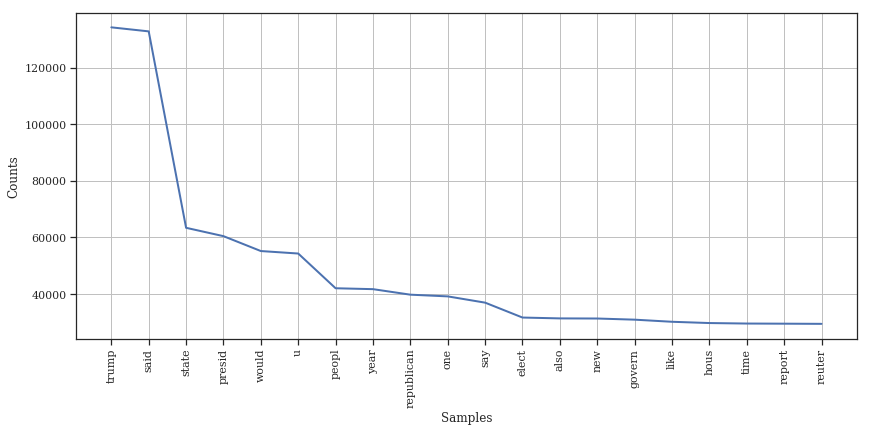

In [168]:
all_words.plot(20,cumulative=False)

In [169]:
#print the total number of words and the 20 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(20)))

Number of words: 96233
Most common words: [('trump', 134252), ('said', 132825), ('state', 63385), ('presid', 60431), ('would', 55167), ('u', 54290), ('peopl', 42013), ('year', 41695), ('republican', 39745), ('one', 39139), ('say', 36925), ('elect', 31659), ('also', 31357), ('new', 31315), ('govern', 30909), ('like', 30163), ('hous', 29714), ('time', 29538), ('report', 29488), ('reuter', 29430)]


In [170]:
#use the 2000 most common words as feature
word_features = list(all_words.keys())[:2000]

In [171]:
#word_features
def find_features(news):
    words = word_tokenize(news)
    features = {}
    for word in word_features:
        features[word]=(word in words)
        
    return features

In [172]:
processed_text[1]

'last time trade measur fell dramat signal incom global financi crash 2007 2008 happen time drop lowest point histori baltic dri index track cost ship dri good around world histor serv sort bellweth global economi well price fall mean trade drop trade drop economi take hit back late 2013 baltic dri index fli high 2 330 even last august still healthi 1 222 week crash 354 imag via busi insiderth reason stop us track last time happen herald global financi crisi 2008 mani economi yet recov back still 600 busi insid report sever occas index point big correct global economi baltic dri index exist current state sinc 1985 first big drop mid 1986 year black monday crash hit market 1987 1999 baltic dri slump 12 year low soon dot com bubbl burst slump anoth massiv low 2001 around time us economi fell recess last 2003 mean definit go crash scale 2008 would foolish argu test infal togeth warn sign economi someth pay seriou attent absolut william white former chief economist switzerland base bank in

In [173]:
features = find_features(processed_text[1])
for key, value in features.items():
    if value == True:
        print (key)

would
issu
last
time
trade
measur
fell
dramat
signal
incom
global
financi
crash
2007
2008
happen
drop
lowest
point
histori
baltic
dri
index
track
cost
ship
good
around
world
histor
serv
sort
bellweth
economi
well
price
fall
mean
take
hit
back
late
2013
fli
high
2
330
even
august
still
healthi
1
222
week
354
imag
via
busi
insiderth
reason
stop
us
herald
crisi
mani
yet
recov
600
insid
report
sever
occas
big
correct
exist
current
state
sinc
1985
first
mid
1986
year
black
monday
market
1987
1999
slump
12
low
soon
dot
com
bubbl
burst
anoth
massiv
2001
recess
2003
definit
go
scale
foolish
argu
test
infal
togeth
warn
sign
someth
pay
seriou
attent
absolut
william
white
former
chief
economist
switzerland
base
bank
intern
settlement
epic
debt
tsunami
wash
situat
wors
macroeconom
ammunit
fight
downturn
essenti
use
question
whether
abl
look
realiti
eye
face
come
orderli
fashion
disorderli
alon
like
goldman
sach
royal
scotland
stark
impend
top
jeremi
penn
exchang
ceo
told
telegraph
stage
peopl
stru

In [174]:
features

{'washington': False,
 'reuter': False,
 'conserv': False,
 'freedom': False,
 'caucu': False,
 'u': False,
 'hous': False,
 'repres': False,
 'said': False,
 'note': False,
 'post': False,
 'twitter': False,
 'wednesday': False,
 'taken': False,
 'offici': False,
 'posit': False,
 'support': False,
 'republican': False,
 'framework': False,
 'tax': False,
 'reform': False,
 'would': True,
 'issu': True,
 'statement': False,
 'later': False,
 'last': True,
 'time': True,
 'trade': True,
 'measur': True,
 'fell': True,
 'dramat': True,
 'signal': True,
 'incom': True,
 'global': True,
 'financi': True,
 'crash': True,
 '2007': True,
 '2008': True,
 'happen': True,
 'drop': True,
 'lowest': True,
 'point': True,
 'histori': True,
 'baltic': True,
 'dri': True,
 'index': True,
 'track': True,
 'cost': True,
 'ship': True,
 'good': True,
 'around': True,
 'world': True,
 'histor': True,
 'serv': True,
 'sort': True,
 'bellweth': True,
 'economi': True,
 'well': True,
 'price': True,
 'fall

In [44]:
y = df2['label']

In [45]:
#find features for all news
news = list(zip(processed_text, y))

#define a seed for reproducibility
seed = 12
np.random.seed = seed
#np.random.shuffle(news)

#call find_features function for each news article
featuresets = [(find_features(text), label) for (text, label) in news]

In [46]:
from sklearn import model_selection
training, testing = model_selection.train_test_split(featuresets, \
                                                    test_size=0.25,random_state = seed)

In [47]:
print(np.shape(featuresets))
#featuresets[3]

(44898, 2)


In [48]:
np.shape(news)

(44898, 2)

In [49]:
df_news = pd.DataFrame(news, columns=['text', 'label'])

In [50]:
df_news.head()

,text,label
0,washington reuter facebook inc fb chief oper o...,0
1,washington reuter republican led feder commun ...,0
2,washington reuter chanc feder govern could han...,0
3,http www youtub com watch v ccr0qvehjik,1
4,beij reuter china unit state creat miracl comp...,0


## Scikit_learn Classifiers with NLTK

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [148]:
#list sklearn models to train
model_names = ['KNeighbors','Decision Tree', 'Random Forest',\
             'Logistic Regression','SGD Classifier','Naive Bayes','SVM Linear']
sklearn_classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(model_names, sklearn_classifiers))
print(models)

[('KNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_e

In [149]:
#wrap models in nltk
from nltk.classify.scikitlearn import SklearnClassifier
import time

for model_name, model in models:
    start = time.time()
    
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing) * 100
    print ('{}: Accuracy: {}'.format(model_name, accuracy))
    
    stop = time.time()
    print("Model run time: {}s".format(stop - start))

KNeighbors: Accuracy: 82.99331848552339
Model run time: 1390.7993314266205s
Decision Tree: Accuracy: 99.43875278396436
Model run time: 69.0574324131012s


C:\Users\pst6817\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Accuracy: 98.83296213808464
Model run time: 74.87096619606018s


C:\Users\pst6817\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Accuracy: 99.81291759465479
Model run time: 61.84638214111328s
SGD Classifier: Accuracy: 99.73273942093542
Model run time: 45.09651327133179s
Naive Bayes: Accuracy: 95.25167037861915
Model run time: 44.82568573951721s
SVM Linear: Accuracy: 99.73273942093542
Model run time: 189.4287829399109s


In [150]:
# ensemble method - Voting classifier
from sklearn.ensemble import VotingClassifier

#list models to train
model_names = ['Decision Tree', 'Random Forest','Logistic Regression',\
               'SGD Classifier','Naive Bayes','SVM Linear']
sklearn_classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(model_names, sklearn_classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models,\
                                    voting = 'hard',n_jobs = 4))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
print('Ensemble Method Accuracy: {}'.format(accuracy))

Ensemble Method Accuracy: 99.83964365256125


In [92]:
# predict class label for testing dataset
text_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(text_features)

In [93]:
# print a classification report and a confusion matrix
print(classification_report(labels, prediction))

pd.DataFrame(confusion_matrix(labels, prediction),
            index = [['actual','actual'], ['Positive','Negative']],
            columns = [['predicted','predicted'], ['Positive','Negative']])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5326
           1       1.00      1.00      1.00      5899

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



predicted         
                 Positive Negative
actual Positive      5320        6
       Negative        25     5874

### Word Counts and Wordcloud

In [80]:
y = df2['label']
news_before_stemming = list(zip(text_before_stemming, y))

In [81]:
df_news = pd.DataFrame(news_before_stemming, columns = ['text','label'])

In [82]:
fake_news = df_news[df_news['label']==1]

In [83]:
fake_news.head()

,text,label
1,last time trade measure fell dramatically sign...,1
3,across nation mainly south number religious fr...,1
5,listening zeke emanuel awkward brother chicago...,1
6,late night television icon david letterman gav...,1
7,former fbi director james comey testifying sen...,1


In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pst6817\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
fake_news_words = nltk.word_tokenize(" ".join(fake_news['text'].values.tolist()))

In [86]:
fake_counter = Counter(fake_news_words)
print(fake_counter.most_common(50))

[('trump', 79300), ('said', 33763), ('president', 27715), ('people', 26570), ('one', 24531), ('would', 23562), ('clinton', 19173), ('obama', 18797), ('like', 18097), ('donald', 17671), ('also', 15403), ('us', 14678), ('news', 14620), ('new', 14394), ('hillary', 14122), ('even', 14011), ('time', 13844), ('state', 13463), ('white', 13189), ('via', 12776), ('twitter', 11721), ('media', 11704), ('american', 11319), ('america', 11185), ('house', 11113), ('campaign', 11107), ('right', 10848), ('get', 10833), ('first', 10603), ('know', 10383), ('could', 10246), ('year', 10221), ('states', 10191), ('many', 9945), ('image', 9895), ('going', 9796), ('u', 9720), ('republican', 9325), ('make', 9254), ('country', 9229), ('government', 9202), ('told', 9122), ('made', 9118), ('two', 9114), ('police', 9110), ('election', 8934), ('years', 8852), ('back', 8824), ('way', 8809), ('say', 8680)]


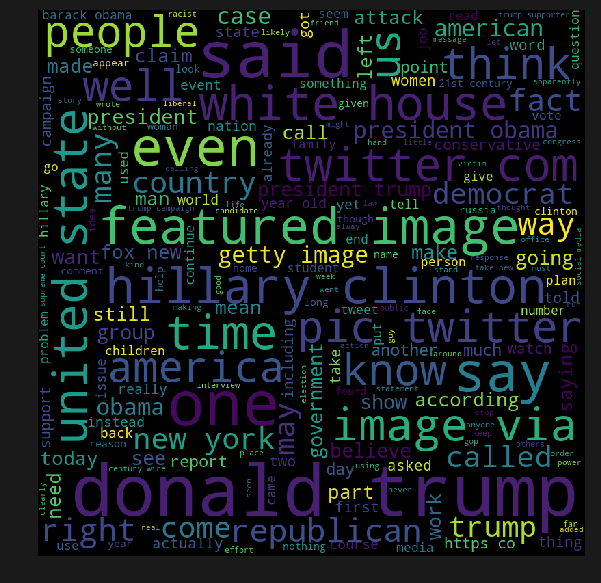

In [100]:
fake_wordcloud = WordCloud(width=800, height=800, random_state = 42).generate(" ".join(fake_news_words))

fig = plt.figure(figsize=(8,8), facecolor = 'k')
plt.imshow(fake_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [88]:
fake_bigrams = nltk.bigrams(fake_news_words)

In [89]:
fake_counter = Counter(fake_bigrams)
print(fake_counter.most_common(10))

[(('donald', 'trump'), 14130), (('featured', 'image'), 7692), (('hillary', 'clinton'), 7248), (('white', 'house'), 6742), (('united', 'states'), 6663), (('twitter', 'com'), 6567), (('image', 'via'), 6326), (('pic', 'twitter'), 6148), (('new', 'york'), 4352), (('president', 'obama'), 4079)]


In [90]:
#true news
true_news = df_news[df_news['label']==0]
true_news.head()

,text,label
0,washington reuters conservative freedom caucus...,0
2,dubai reuters saudi arabia king salman begin v...,0
4,washington reuters canadian prime minister jus...,0
8,paris reuters france foreign ministry said tue...,0
10,seoul reuters north korea congratulated china ...,0


In [91]:
true_news_words = nltk.word_tokenize(" ".join(true_news['text'].values.tolist()))

In [92]:
true_news_counter = Counter(true_news_words)
print(true_news_counter.most_common(50))

[('said', 99062), ('trump', 54700), ('u', 44570), ('would', 31605), ('reuters', 28976), ('president', 28177), ('state', 21025), ('government', 18846), ('new', 16917), ('states', 16652), ('house', 16640), ('republican', 16243), ('also', 15954), ('united', 15590), ('people', 15287), ('year', 14777), ('told', 14245), ('could', 13711), ('one', 13396), ('washington', 12988), ('party', 12759), ('last', 12758), ('two', 12711), ('election', 12306), ('campaign', 10636), ('former', 10603), ('donald', 10456), ('security', 10162), ('percent', 10012), ('north', 9912), ('white', 9556), ('court', 9525), ('clinton', 9522), ('obama', 9406), ('senate', 9253), ('country', 8890), ('china', 8865), ('first', 8809), ('minister', 8682), ('officials', 8479), ('week', 8443), ('democratic', 8387), ('since', 8334), ('foreign', 8270), ('tuesday', 8268), ('administration', 8242), ('law', 8228), ('national', 8227), ('tax', 8192), ('including', 8123)]


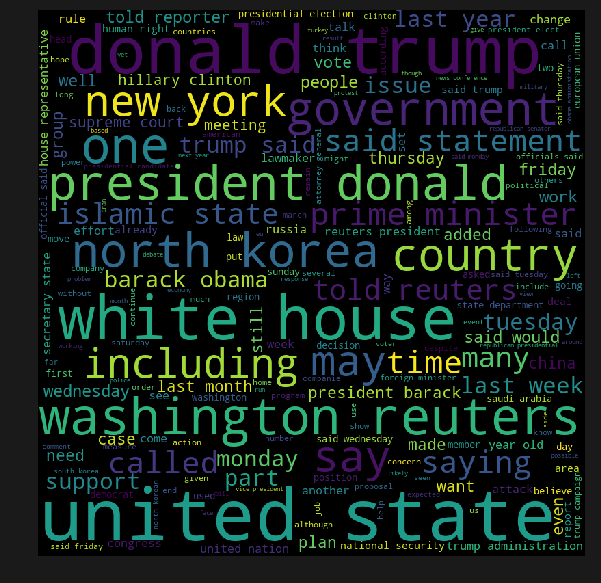

In [99]:
true_news_wordcloud = WordCloud(width=800, height=800, random_state = 42).generate(" ".join(true_news_words))

fig = plt.figure(figsize=(8,8), facecolor = 'k' )
plt.imshow(true_news_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [97]:
true_news_bigrams = nltk.bigrams(true_news_words)

In [98]:
true_news_counter = Counter(true_news_bigrams)
print(true_news_counter.most_common(10))

[(('united', 'states'), 12204), (('donald', 'trump'), 10135), (('white', 'house'), 8419), (('washington', 'reuters'), 6678), (('president', 'donald'), 5930), (('north', 'korea'), 5659), (('new', 'york'), 4740), (('prime', 'minister'), 4163), (('said', 'statement'), 3927), (('u', 'president'), 3879)]
